# Emotion Detection Model generation

In this notebook i will explain how to create Convolutional Neural Network Model from scratch by using **Keras: the python deep learning api**. To understand this thouroughly you should have some basic knowledge of python, Convolutional Neural Network(CNN) and the different layers which are used in CNN.


I have divided this notebook into tasks to make it easier to understand.

## Task 1:

Import the required modules that are needed in this project.

In [6]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os
import pandas as pd

Now let's define some variables that will save the time of writing the values manually again and again.

In [7]:
num_classes=5
img_rows,img_cols=48,48
batch_size=32

The discription for above variables are as follows:

- num_classses = 5 : This variable defines the number of classes or the emotions that we will be dealing with in training our model.

- img_rows,img_cols=48,48 : These variables define the size of the image array that we will be feeding to our neural network.

- batch_size=32: This variable defines the batch size.The batch size is a number of samples processed before the model is updated. The number of epochs is the number of complete passes through the training dataset. The size of a batch must be more than or equal to one and less than or equal to the number of samples in the training dataset.

## Task 2:

Now time to take out the big guns!!

Now it's time to load our dataset. It's the dataset that makes a deeplearning model what it is. Here i am using the **fer2013** dataset which is an open source dataset hosted on [kaggle](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data). The dataset contains totally 7 classes namely Angry,Disgust,Fear,Happy,Sad,Surprise and Neutral.The training set consists of a total of 28,709 examples.

I have segregated the data in different folders containing imgages pertaing to the foldername. For example, Angry folder contains pics with angry faces etc.Here we are using 5 classes which include Angry,Happy,Sad,Surprise and Neutral.So in total i am using 24256 images as training data and using 3006 images as validation data.

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
train_data_dir= '/content/drive/MyDrive/SS Data/train'
validation_data_dir= '/content/drive/MyDrive/SS Data/validation'

The above two lines import the validation and training data. The model is trained on the training dataset and the validation datadet is a part of the original dataset which is seperated from it to check the performance of the model on the data that it has never seen before.

## Task 3:

Now we will be using Image Augmentation techniques om our dataset. Image data augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.The Keras deep learning neural network library provides the capability to fit models using image data augmentation via the ImageDataGenerator class.

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

The train_datagen variable will artificially expand the dataset using the following:

- rotation_range: Degree range for random rotations. Here i am using 30$^\circ$ 
- shear_range: Shear Intensity (Shear angle in counter-clockwise direction in degrees). Here i am using 0.3 as shear range.
- zoom_range: Range for random zoom..Here i am using 0.3 as zoom range.
- width_shift_range: This shifts the images by a value across its width.
- height_shift_range : This shifts the images by a value across its height.
- horizontal_flip: This flips the images horizontally.
- fill_mode: This is used to fill in the pixels after making changes to the orientation of the images by the above used methods. Here i am using 'nearest' as the fill mode as i am instructing it to fill the missing pixels in the image with the nearby pixels.

Here i am resclaing the validation data and not performing any other augmentaions as i want to check the model with raw data that is different from the data used in the training of the model.

In [11]:
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        color_mode='grayscale',
                        target_size=(img_rows,img_cols),
                        batch_size=batch_size,
                        class_mode='categorical',
                        shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
                                validation_data_dir,
                                color_mode='grayscale',
                                target_size=(img_rows,img_cols),
                                batch_size=batch_size,
                                class_mode='categorical',
                                shuffle=True)

Found 24257 images belonging to 5 classes.
Found 3006 images belonging to 5 classes.


Now i am using the **flow_from_directory()** method to load our dataset from the directory which is augmented and stored in the train_generator and validation_generator varianbles.**flow_from_directory()** actually takes the path to a directory & generates batches of augmented data. So here i am giving some options to the method to automatically change the dimention and divide it in the classes so that it is easier to feed in the model.

The options given are:

- directory: The directory of the dataset.
- color_mode: Here i am converting the images to grayscale as i am not interested in the color of the images but only the expressions.
- target_size: Convert the images to a uniform size.
- batch_size: To make baches of data to train.
- class_mode: Here i am using 'categorical' as the class mode as i am categorizing my images into 5 classes.
- shuffle: To shuffle the dataset for better training.

## Task 4:

The dataset modifications is complete and now it's time to make the brain of the model i.e. the CNN Network.

So firstly i will define the type of model that i will be using. Here i am using a **Sequential** model which defines that all the layers in the network will be one after the other sequentially.

In [12]:
model = Sequential()

The network consists of 7 blocks:
(**Note:I will be explaning each layer one by one at the last**)
- ### Block-1

In [13]:
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

- ### Block-2

In [14]:
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

- ### Block-3

In [15]:
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

- ### Block-4

In [16]:
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

- ### Block-5

In [17]:
model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

- ### Block-6

In [18]:
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

- ### Block-7

In [19]:
model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

This seems a lot actually it is a lot.

Here i have used the layers of 7 types which are present in **keras.layers**.

The layers are:

- Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
    dilation_rate=(1, 1), activation=None, use_bias=True,
    kernel_initializer='glorot_uniform', bias_initializer='zeros',
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, bias_constraint=None, **kwargs
)
- Activation(activation_type)

- BatchNormalization()

- MaxPooling2D(pool_size, strides, padding, data_format, **kwargs)

- Dropout(dropout_value) 

- Flatten()

- Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs)

#### Block-1 layers in the order of occurrence are as follows :

- Conv2D layer- This layer creates a convolutional layer for the network. Here i am creating a layer with 32 filters and a filter size of (3,3) with padding='same' to pad the image and using the  kernel initializer he_normal. I have added 2 convolutional layers each followed by an activation and batch normalization layers.
- Activation layer - I am using a elu activation.
- BatchNormalization - Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
- MaxPooling2D layer - Downsamples the input representation by taking the maximum value over the window defined by pool_size for each dimension along the features axis.Here i have used the pool_size as (2,2).
- Dropout: Dropout is a technique where randomly selected neurons are ignored during training. Here i am using dropout as 0.5 which means that it will ignore half of the neurons.

#### Block-2 layers in the order of occurrence are as follows :

- Same layers as block-1 but the convolutional layers have 64 filters.

#### Block-3 layers in the order of occurrence are as follows :

- Same layers as block-1 but the convolutional layers have 128 filters.

#### Block-4 layers in the order of occurrence are as follows :

- Same layers as block-1 but the convolutional layers have 256 filters.

#### Block-5 layers in the order of occurrence are as follows :

- Flatten layer - To flatten the output of the previous layers in a falat layer or in other words in the form of a vector.
- Dense layer - A densely connected layer where each neuron is connected to every other neuron. Here i am using 64 units or 64 neurons with a kernal initializer - he_normal.
- These layers are followed by activation layer with elu activation , batch normalization and finally a dropout with 50% dropout.

#### Block-6 layers in the order of occurrence are as follows :

- Same layers as blcok 5 but without flatten layer as the input for this block is already flattened.

#### Block-7 layers in the order of occurrence are as follows :

- Dense layer - Finally in the final block of the network i am using num_classes to create a dense layer having units=number of classes with a he_normal initializer.

- Activation layer - Here i am using a softmax layer which is used for multi-class classifications.

Too many layers, but finally it's over!!

Now to check the overall structure of the model:

In [20]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0

This is a big network which consits of 1,328,037 parameters.

## Task 5:

The final task!!

Now the only thing left is to compile and train the model. But first let's import some more things.

In [21]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

Now let's do the magic.

Before compiling i will create 3 things using **keras.callbacks** class:

#### Checkpoint( Function - ModelCheckpoint() )

It will monitor the validation loss and will try to minimise the loss using the mode='min' property. When the checkpoint is reached it will save the best trained weights. Verbose=1 is just for visulaisation when the code created checkpoint.Here i am using it's following parameters:

- filepath: Path to save the model file.Here i am saving the model file with the name EmotionDetectionModel.h5
- monitor: Quantity to monitor.Here i am monitoring the validation loss.
- mode: One of {auto, min, max}. If save_best_only=True, the decision to overwrite the current save file is made based on either the maximization or the minimization of the monitored quantity.
- save_best_only: If save_best_only=True, the latest best model according to the quantity monitored will not be overwritten.
- verbose: int. 0: quiet, 1: update messages.

#### Early Stopping ( Function - EarlyStopping() )

This will stop the execution early by checking the following properties.

- monitor:  Quantity to monitor.Here i am monitoring the validation loss.
- min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.Here i have given it 0.
- patience: Number of epochs with no improvement after which training will be stopped. Here i have given it 3.
- restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.Here i have given it True.
- verbose: int. 0: quiet, 1: update messages.

#### Reduce Learning Rate ( Function - ReduceLROnPlateau() )

Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced. I have used the following properties for this.

- monitor: To monitor a particular loss. Here i am monitoring the validation loss.
- factor: Factor by which the learning rate will be reduced. **new_lr = lr * factor**. Here i am using 0.2 as factor.
- patience: Number of epochs with no improvement after which learning rate will be reduced.Here i am using 3.
- min_delta: Threshold for measuring the new optimum, to only focus on significant changes.
- verbose: int. 0: quiet, 1: update messages.

In [22]:

checkpoint = ModelCheckpoint('EmotionDetectionModel.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [earlystop,checkpoint,reduce_lr]

Now it's time to finally compile the model using **model.compile()** and fit or train the model on the dataset using **model.fit_generator()**

#### model.compile()

It has the following arguments:

- loss: This value will determine the type of loss function to use in your code. Here i have categorical data in 5 categories or classes so i have used 'categorical_crossentropy' loss.
- optimizer: This value will determine the type of optimizer function to use in your code.Here i have used Adam optimizer with learning rate 0.001 as it is the best optimizer for categorical data.
- metrics: The metrics argument should be a list - you model can have any number of metrics.It is the list of metrics to be evaluated by the model during training and testing.Here i have used accuracy as metric which will compile mu model according to the accuracy.

#### model.fit_generator()

Fits the model on data yielded batch-by-batch by a Python generator.

It has the following arguments:

- generator: The train_generator object that we created earlier.
- steps_per_epochs: The steps to take on the training data in one epoch.
- epochs: The total number of epochs (pass though the whole dataset once).
- callbacks: The list containing all the callbacks that we created earlier.
- validation_data: The validation_generator object that we created earlier.
- validation_steps: The steps to take on the validation data in one epoch.

In [24]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 2417
nb_validation_samples = 300
epochs=25

history=model.fit_generator(
                train_generator,
                steps_per_epoch=nb_train_samples//batch_size,
                epochs=epochs,
                callbacks=callbacks,
                validation_data=validation_generator,
                validation_steps=nb_validation_samples//batch_size)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
75/75 [==============================] - 357s 5s/step - loss: 1.8063 - accuracy: 0.2371 - val_loss: 1.9266 - val_accuracy: 0.2188

Epoch 00001: val_loss improved from inf to 1.92659, saving model to EmotionDetectionModel.h5
Epoch 2/25
75/75 [==============================] - 359s 5s/step - loss: 1.7294 - accuracy: 0.2250 - val_loss: 1.7386 - val_accuracy: 0.2639

Epoch 00002: val_loss improved from 1.92659 to 1.73858, saving model to EmotionDetectionModel.h5
Epoch 3/25
75/75 [==============================] - 321s 4s/step - loss: 1.7032 - accuracy: 0.2419 - val_loss: 1.5601 - val_accuracy: 0.3194

Epoch 00003: val_loss improved from 1.73858 to 1.56007, saving model to EmotionDetectionModel.h5
Epoch 4/25
75/75 [==============================] - 297s 4s/step - loss: 1.6145 - accuracy: 0.2744 - val_loss: 1.6019 - val_accuracy: 0.2569

Epoch 00004: val_loss did not improve from 1.56007
Epoch 5/25
75/75 [==============================] - 283s 4s/step - loss: 1.6273 - accuracy: 0.

# DONE!!

The model generation is completed now you can use this model to create the emotion detector.

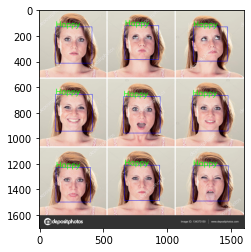

In [65]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
import matplotlib.pyplot as plt


face_classifier=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
classifier = load_model('EmotionDetectionModel.h5')

class_labels=['Angry','Happy','Neutral','Sad','Surprise']

img=cv2.imread("/content/drive/MyDrive/SS Data/emots.jpg")


imgGray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_classifier.detectMultiScale(imgGray,1.1,4)

while True:
    frame=img
    labels=[]
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_classifier.detectMultiScale(gray,1.3,5)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

        if np.sum([roi_gray])!=0:
            roi=roi_gray.astype('float')/255.0
            roi=img_to_array(roi)
            roi=np.expand_dims(roi,axis=0)

            preds=classifier.predict(roi)[0]
            label=class_labels[preds.argmax()]
            label_position=(x,y)
            cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
            #break
        else:
            cv2.putText(frame,'No Face Found',(20,20),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)      
    break
    
    #cv2.imshow('Emotion Detector',frame)
  
#for (x,y,w,h) in faces:
 #   cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.show()
